In [1]:
%matplotlib inline
import numpy as np
import glob
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
import os

In [2]:
list_ = []
for name in os.listdir('500GeV_res/csv/'):
    filename = '500GeV_res/csv/' + name
    df = pd.read_csv(filename,delimiter= ' ')
    list_.append(df)

In [3]:
full_dataframe = pd.concat(list_,ignore_index=True)

In [4]:
full_dataframe.shape

(608979, 20)

In [5]:
y_tcHW = full_dataframe['tcHW']
y_cHW = full_dataframe['cHW']
xsec = full_dataframe['xsec']

In [6]:
y_target = np.array([y_cHW, y_tcHW, xsec]).T

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

In [8]:
full_dataframe.drop(labels=['cHW','tcHW','xsec'],axis=1,inplace=True)

In [9]:
X = full_dataframe

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_target,
                                                    train_size=0.8,
                                                    random_state=4)

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
max_depth = 5
regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [12]:
y_rf = regr_rf.predict(X_test)

In [13]:
y_rf.shape

(121796, 3)

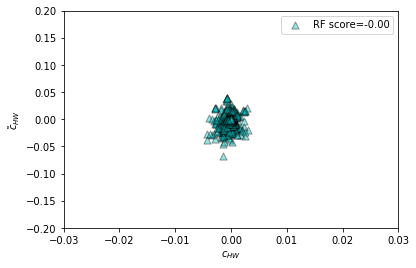

In [14]:
plt.figure()
s = 50
a = 0.4
#plt.scatter(y_test[:, 0], y_test[:, 1], edgecolor='k',
 #           c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(y_rf[:, 0], y_rf[:, 1], edgecolor='k',
            c="c", s=s, marker="^", alpha=a,
            label="RF score=%.2f" % regr_rf.score(X_test, y_test))
plt.xlim([y_test[:, 0].min(),y_test[:, 0].max()])
plt.ylim([y_test[:, 1].min(),y_test[:, 1].max()])
plt.xlabel("$c_{HW}$")
plt.ylabel("$\~c_{HW}$")
#plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()

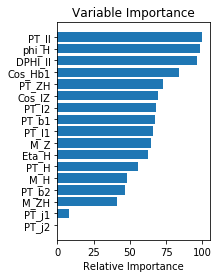

In [15]:
# Plot feature importance
feature_importance = regr_rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
#plt.savefig("Variable Importance.pdf", dpi=300)
plt.show()

In [17]:
np.savetxt('predictions.txt',y_rf,delimiter=',',header='cHW(x),tcHW(y)')

In [18]:
np.savetxt('y_test.txt',y_test,delimiter=',',header='cHW(x),tcHW(y)')

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test,y_rf)

-4.3477786955866309e-06

In [17]:
estimators = np.arange(10, 100, 10)
scores = []
for n in estimators:
    regr_rf.set_params(n_estimators=n)
    regr_rf.fit(X_train, y_train)
    scores.append(regr_rf.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

KeyboardInterrupt: 

In [18]:
scores

[-0.00014225907248917544, -8.6811587997928064e-05, -5.5746661440048896e-05]